# Project: The Automated Hiring Manager 🤝
**Goal:** Build a model that screens resumes and decides who gets hired.
**The Tool:** Decision Tree Classifier.
**The Concept:** "20 Questions."

The model splits data into smaller and smaller groups by asking Yes/No questions (e.g., "Is Experience > 5 years?"). It builds a flowchart to reach a decision.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Set visual style
plt.rcParams['figure.figsize'] = (12, 8)

# Load Data
df = pd.read_csv('tech_hiring_data.csv')

df.head()

,Candidate_ID,Years_Experience,Python_Score,Degree,Has_Internship,Has_Referral,Hired
0,1,7.0,6,Bachelor,0,1,1
1,2,4.4,0,Master,1,0,0
2,3,7.6,7,PhD,1,0,1
3,4,11.1,10,Bachelor,1,0,1
4,5,4.1,2,Master,1,0,1


### Step 1: Preprocessing
Decision Trees in Python (Scikit-Learn) cannot understand text like "Bachelor" or "Master."
We must convert the 'Degree' column into numbers using **Mapping**.
* None = 0
* Bachelor = 1
* Master = 2
* PhD = 3

In [6]:
# Map text degrees to numbers
degree_map = {'None': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
df['Degree_Num'] = df['Degree'].map(degree_map)

# Select Features (X) and Target (y)
features = ['Years_Experience', 'Python_Score', 'Degree_Num', 'Has_Internship', 'Has_Referral']
X = df[features]
y = df['Hired']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Encoded and Split.")

Data Encoded and Split.


### Step 2: Training
We create the `DecisionTreeClassifier`.
**Important Parameter:** `max_depth`.
If we don't limit the depth, the tree will grow infinitely complex and memorize every single resume (Overfitting). We limit it to `max_depth=3` so the flowchart stays simple and readable.

In [7]:
# Initialize Model with a limit of 3 layers
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train
model.fit(X_train, y_train)

print("✅ The AI Hiring Manager has learned the rules.")

✅ The AI Hiring Manager has learned the rules.


### Step 3: The Flowchart (The "Magic" of Trees)
Unlike Neural Networks (Black Boxes), we can actually **see** how this model thinks.
We will plot the tree.

**How to read it:**
* **Top Box (Root):** The most important question (e.g., Experience <= 4.5?).
* **Left Arrow:** True (Yes).
* **Right Arrow:** False (No).
* **Color:** Orange = Rejected, Blue = Hired.

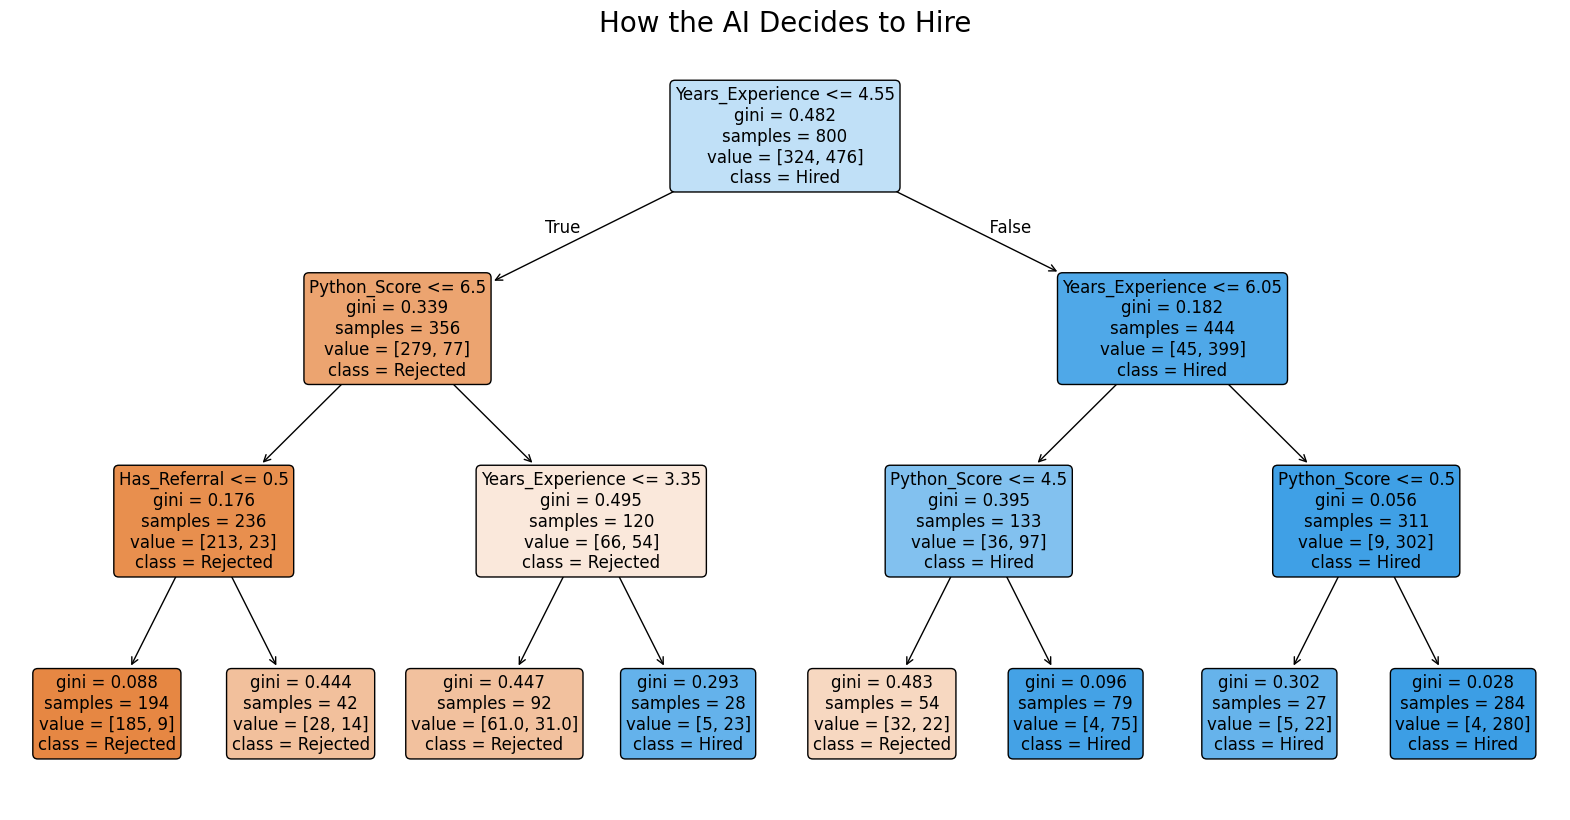

In [8]:
plt.figure(figsize=(20, 10))

plot_tree(model, 
          feature_names=features, 
          class_names=['Rejected', 'Hired'], 
          filled=True, 
          rounded=True, 
          fontsize=12)

plt.title("How the AI Decides to Hire", fontsize=20)
plt.show()

### Step 4: Testing
Let's see how accurate our AI Manager is on the 200 resumes it hasn't seen yet.

In [9]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")

# Feature Importance (Which skill mattered most?)
importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
display(importances.sort_values(by='Importance', ascending=False))

Model Accuracy: 86.50%


,Feature,Importance
0,Years_Experience,0.817530
1,Python_Score,0.159792
4,Has_Referral,0.022678
2,Degree_Num,0.000000
3,Has_Internship,0.000000


# Conclusion: The AI Manager's Report

We have successfully built and visualized a **Decision Tree Classifier** that automates the hiring process.

### Key Findings
1.  **Experience is the Root:** The model identified "Years of Experience" as the most critical factor. This is the first question it asks every candidate.
2.  **Skills Over Degrees:** While having a degree helps, the model prioritized the "Python Score" in the decision path, showing that practical skills often outweigh academic titles in this dataset.
3.  **The Referral Shortcut:** The tree found a specific path where candidates with Referrals were hired even if their other scores were slightly lower, mimicking real-world networking advantages.

### The Business Value: Interpretability
The biggest advantage of this model is that it is a **"White Box"**.
Unlike Neural Networks, which are difficult to interpret, we can print out this flowchart and explain exactly *why* a candidate was rejected to HR or Legal teams.

### Next Steps
Decision Trees are powerful but prone to "Overfitting" (memorizing the training data too closely). To fix this, we can use a **Random Forest**, which combines hundreds of trees to make a more stable voting decision.